In [39]:
from pandas import DataFrame
import pandas as pd
import numpy as np
from Bio import Entrez 
import pycurl
import matplotlib.pyplot as plt

In [2]:
#Create ouput folder
import os, sys

cwd = os.getcwd()
output_folder = "output" #name output folder, use \ for directory

if not os.path.isdir(cwd + output_folder):
    os.mkdir(cwd + output_folder)

new_dir = cwd + output_folder
    
print(cwd)

E:\Jupyter_Lab\Genome Mining


In [3]:
#Pilih data dari Sebaceous
df1 = pd.read_csv("Byrd_2018_Bacteria.csv")
#print(df1)
df2 = df1.loc[:,'Sebaceous']
print(df2)

0               Propionibacterium acnes
1            Staphylococcus epidermidis
2    Corynebacterium tuberculostearicum
3                Staphylococcus capitis
4              Corynebacterium simulans
5                   Streptococcus mitis
6                Staphylococcus hominis
7           Corynebacterium aurimucosum
8        Corynebacterium kroppenstedtii
9            Corynebacterium amycolatum
Name: Sebaceous, dtype: object


In [4]:
#Email for NCBI
Entrez.email = "matin_nuhamunada@mail.ugm.ac.id"
handle = Entrez.esearch(db="genome", term=df2[0])
record = Entrez.read(handle)
print(record['IdList'])
print(record['QueryTranslation'])

['1140']
"Cutibacterium acnes"[Organism]


In [8]:
def get_GenomeAssembly(G, S):
    F = G+'_'+S+'.csv'
    if not os.path.isfile(F):
        with open(F, 'wb') as f:
            c = pycurl.Curl()
            c.setopt(c.URL, 'https://www.ncbi.nlm.nih.gov/genomes/Genome2BE/genome2srv.cgi?action=download&orgn=%22'+G+'%20'+S+'%22[orgn]&status=50|40||30|20&report=proks&group=--%20All%20Prokaryotes%20--&subgroup=--%20All%20Prokaryotes%20--&format=csv')
            c.setopt(c.WRITEDATA, f)
            c.perform()
            c.close()
    return F

In [9]:
get_GenomeAssembly('Cutibacterium', 'acnes')

'Cutibacterium_acnes.csv'

In [79]:
df3 = pd.read_csv('Cutibacterium_acnes.csv')
df3.head(n=2)

,#Organism/Name,Strain,CladeID,BioSample,BioProject,Group,SubGroup,Assembly,Size (Mb),GC%,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
0,Cutibacterium acnes KPA171202,KPA171202,20872,SAMN02603281,PRJNA12460,Terrabacteria group,Actinobacteria,GCA_000008345.1,2.56026,60.0,chromosome:NC_006085.1/AE017283.1,-,1,2565,2416,2004/07/30,2017/03/29,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
1,Cutibacterium acnes SK137,SK137,20872,SAMN00000718,PRJNA31005,Terrabacteria group,Actinobacteria,GCA_000025765.1,2.49533,60.1,chromosome:NC_014039.1/CP001977.1,-,1,2525,2390,2010/03/23,2017/03/30,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...


In [80]:
#Filter by "Organism/Name", "Strain", "Size(Mb)", "GC%", "Replicons", "Level"
df4 = df3.loc[:,'Replicons']
df4[9]

'chromosome:NC_021085.1/CP003293.1; plasmid unnamed:NC_021086.1/CP003294.1'

In [85]:
df_Complete = df3[df3['Level'].str.contains("Complete Genome")]
df_Complete = df_Complete[['#Organism/Name','Strain', 'Size (Mb)', 'GC%', 'Replicons', 'Level', 'Genes', 'Proteins']]

In [91]:
df_Complete.head(n=2)

df_Complete.loc[:, 'Genes'] = df_Complete.loc[:, 'Genes'].astype(int)
df_Complete.loc[:, 'Proteins'] = df_Complete.loc[:, 'Proteins'].astype(int)

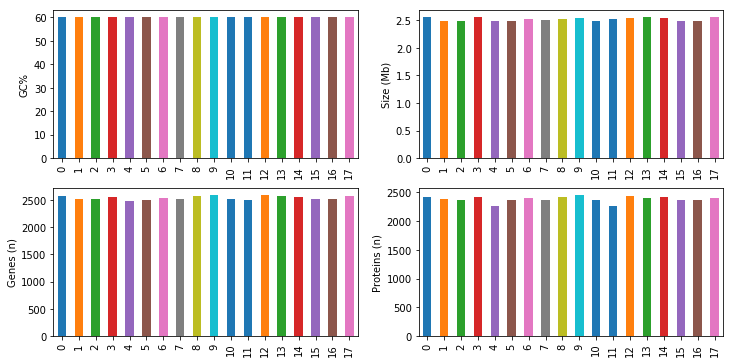

In [121]:
%matplotlib inline

f = plt.figure(figsize=(12,6))
f.
f.add_subplot(221)
df_Complete.loc[:, 'GC%'].plot(kind='bar')
plt.ylabel('GC%')

f.add_subplot(222)
df_Complete.loc[:, 'Size (Mb)'].plot(kind='bar')
plt.ylabel('Size (Mb)')

f.add_subplot(223)
df_Complete.loc[:, 'Genes'].plot(kind='bar')
plt.ylabel('Genes (n)')

f.add_subplot(224)
df_Complete.loc[:, 'Proteins'].plot(kind='bar')
plt.ylabel('Proteins (n)')

plt.show()
